In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time
import requests

## THU THẬP DỮ LIỆU VỀ CÁC CÂU NÓI CỦA NGƯỜI NỔI TIẾNG

###  3.1.1 Viết code cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương ứng (kq.txt)

In [2]:
def crawl_3_1():
    base='http://quotes.toscrape.com'
    url = '/page/1/'
    html=''
    with open ('kq.txt','w',encoding='utf-8') as f:
        while url:
            res=requests.get(base+url)
            soup=BeautifulSoup(res.text,'html.parser')
            quotes=soup.find_all('div',class_='quote')
            for quote in quotes:
                f.write(str(quote))
                f.write('\n')
                html+=str(quote)
            next=soup.find('li',class_='next')
            url=next.a['href'] if next else None
    print("luu thanh cong\n")
    return html


In [3]:
print(crawl_3_1())

luu thanh cong

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div><div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop=

In [4]:
def result():
    with  open('kq.txt','r',encoding='utf-8') as f:
        quote=f.read()
    soup=BeautifulSoup(quote,'html.parser')
    result=soup.find_all('div',class_='quote')
    print('da luu vao result\n')
    for re in result:
        print(re.prettify())
    return result


### 3.1.2A Đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’, hiển thị giá trị biến 'result’ ra màn hình

In [5]:
result=result()
print(result)

da luu vao result

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">
  “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
 </span>
 <span>
  by
  <small class="author" itemprop="author">
   Albert Einstein
  </small>
  <a href="/author/Albert-Einstein">
   (about)
  </a>
 </span>
 <div class="tags">
  Tags:
  <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
  <a class="tag" href="/tag/change/page/1/">
   change
  </a>
  <a class="tag" href="/tag/deep-thoughts/page/1/">
   deep-thoughts
  </a>
  <a class="tag" href="/tag/thinking/page/1/">
   thinking
  </a>
  <a class="tag" href="/tag/world/page/1/">
   world
  </a>
 </div>
</div>

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">
  “It is our choices, Harry, that show what we truly are, far more than our abi

### 3.1.2B Tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small"  với class là "author" và in kết quả ra màn hình

In [6]:
def result_author(result):
    author=[]
    for quote in result:
        authors=quote.find('small',class_='author')
        if authors:
            print(authors.text)
            author.append(authors.text)
    return author

In [7]:
print(result_author(result))

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin
Marilyn Monroe
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
Douglas Adams
Elie Wiesel
Friedrich Nietzsche
Mark Twain
Allen Saunders
Pablo Neruda
Ralph Waldo Emerson
Mother Teresa
Garrison Keillor
Jim Henson
Dr. Seuss
Albert Einstein
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
J.K. Rowling
Bob Marley
Mother Teresa
J.K. Rowling
Charles M. Schulz
William Nicholson
Albert Einstein
Jorge Luis Borges
George Eliot
George R.R. Martin
C.S. Lewis
Marilyn Monroe
Marilyn Monroe
Albert Einstein
Marilyn Monroe
Marilyn Monroe
Martin Luther King Jr.
J.K. Rowling
James Baldwin
Jane Austen
Eleanor Roosevelt
Marilyn Monroe
Albert Einstein
Haruki Murakami
Alexandre Dumas fils
Stephenie Meyer
Ernest Hemingway
Helen Keller
George Bernard Shaw
Charles Bukowski
Suzanne Collins
Suzanne Collins
C.S. Lewis
J.R.R. Tolkien
J.K. Rowling
Ernest Hemingway
Ralph 

### 3.1.2C Viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả

In [8]:
def tacgiaLink():
    import requests
    from bs4 import BeautifulSoup

    base_url = "http://quotes.toscrape.com"
    url = "/page/1/"
    authors_data = {}

    while url:
        response = requests.get(base_url + url)
        soup = BeautifulSoup(response.text, "html.parser")
        quotes = soup.find_all("div", class_="quote")
        for quote in quotes:
            quote_text = quote.find("span", class_="text").text.strip()
            author = quote.find("small", class_="author").text.strip()
            link = base_url + quote.find("a")["href"]

            if author not in authors_data:
                # Lấy ngày sinh nếu chưa có tác giả này
                author_page = requests.get(link)
                author_soup = BeautifulSoup(author_page.text, "html.parser")
                dob_tag = author_soup.find("span", class_="author-born-date")
                dob = dob_tag.text.strip() if dob_tag else "Không rõ"
                authors_data[author] = {
                    "Link": link,
                    "Namsinh": dob,
                    "Quotes": [quote_text]
                }
            else:
                # Nếu đã có tác giả, chỉ thêm câu nói
                authors_data[author]["Quotes"].append(quote_text)

        next_btn = soup.find("li", class_="next")
        url = next_btn.a['href'] if next_btn else None

    # Hiển thị dữ liệu
    for author, info in authors_data.items():
        print(f"Tác giả: {author}")
        print(f"Link: {info['Link']}")
        print(f"Ngày sinh: {info['Namsinh']}")
        print("Câu nói:")
        for q in info["Quotes"]:
            print(f"- {q}")
        print("-" * 60)

    return authors_data


In [9]:
dd=tacgiaLink()
dd

Tác giả: Albert Einstein
Link: http://quotes.toscrape.com/author/Albert-Einstein
Ngày sinh: March 14, 1879
Câu nói:
- “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
- “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
- “Try not to become a man of success. Rather become a man of value.”
- “If you can't explain it to a six year old, you don't understand it yourself.”
- “If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.”
- “Logic will get you from A to Z; imagination will get you everywhere.”
- “Any fool can know. The point is to understand.”
- “Life is like riding a bicycle. To keep your balance, you must keep moving.”
- “If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in term

{'Albert Einstein': {'Link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'Namsinh': 'March 14, 1879',
  'Quotes': ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
   '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
   '“Try not to become a man of success. Rather become a man of value.”',
   "“If you can't explain it to a six year old, you don't understand it yourself.”",
   '“If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.”',
   '“Logic will get you from A to Z; imagination will get you everywhere.”',
   '“Any fool can know. The point is to understand.”',
   '“Life is like riding a bicycle. To keep your balance, you must keep moving.”',
   '“If I were not a physicist, I would probably be a musician. I often think in music. I live my 

### 3.1.2D Lưu kết quả ở câu c vào file Quote.csv tương ứng

In [10]:
def save_to_csv(data):
    import csv

    with open("Quote.csv", mode="w", encoding="utf-8", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Tacgia", "Link", "Ngaysinh", "Quote"])
        for author, info in data.items():
            for quote in info["Quotes"]:
                writer.writerow([author, info["Link"], info["Namsinh"], quote])

save_to_csv(dd)

In [11]:
df=pd.read_csv('Quote.csv')
df.head(20)

,Tacgia,Link,Ngaysinh,Quote
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...
1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Try not to become a man of success. Rather be...
3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you can't explain it to a six year old, yo..."
4,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you want your children to be intelligent, ..."
5,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Logic will get you from A to Z; imagination w...
6,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Any fool can know. The point is to understand.”
7,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Life is like riding a bicycle. To keep your b...
8,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If I were not a physicist, I would probably b..."
9,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Anyone who has never made a mistake has never...


### 3.2.1A Thêm vào Trường STT và điền tự động dữ liệu của trường này

In [12]:
#them truong du lieu stt
df.insert(0,"STT", range(1,len(df)+1))
df.head(5)

,STT,Tacgia,Link,Ngaysinh,Quote
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...
1,2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Try not to become a man of success. Rather be...
3,4,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you can't explain it to a six year old, yo..."
4,5,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you want your children to be intelligent, ..."


### 3.2.1B Đề xuất cách điền  một số giá trị của dữ liệu Trường ngày sinh chưa có

In [13]:
#Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền
df['Ngaysinh']=df['Ngaysinh'].fillna("unknow")
print(df[df['Ngaysinh']=='unknow'])

Empty DataFrame
Columns: [STT, Tacgia, Link, Ngaysinh, Quote]
Index: []


### 3.2.1c Thêm trường Tuổi

In [14]:
#ạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả?  

from datetime import datetime
def tinhtuoi(ngaysinh):
    try:
        nam=datetime.strptime(ngaysinh,"%B %d, %Y")
        return datetime.now().year - nam.year
    except:
        return None
df['Tuoi']=df['Ngaysinh'].apply(tinhtuoi)
df.head()        

,STT,Tacgia,Link,Ngaysinh,Quote,Tuoi
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“The world as we have created it is a process ...,146
1,2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“There are only two ways to live your life. On...,146
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",“Try not to become a man of success. Rather be...,146
3,4,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you can't explain it to a six year old, yo...",146
4,5,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879","“If you want your children to be intelligent, ...",146


### 3.2.2 Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

In [15]:
#thong ke so luong tac gia va cau noi
print("So luong tac gia:",df['Tacgia'].nunique())
print('So luong cau noi:',len(df))
print('So luong cau noi noi tieng cua tung tac gia:',df['Tacgia'].value_counts())

So luong tac gia: 50
So luong cau noi: 100
So luong cau noi noi tieng cua tung tac gia: Tacgia
Albert Einstein           10
J.K. Rowling               9
Marilyn Monroe             7
Dr. Seuss                  6
Mark Twain                 6
C.S. Lewis                 5
Jane Austen                5
Bob Marley                 3
Eleanor Roosevelt          2
Charles Bukowski           2
Suzanne Collins            2
George R.R. Martin         2
Ralph Waldo Emerson        2
Mother Teresa              2
Ernest Hemingway           2
J.D. Salinger              1
George Bernard Shaw        1
J.R.R. Tolkien             1
Alfred Tennyson            1
Terry Pratchett            1
John Lennon                1
George Carlin              1
W.C. Fields                1
Ayn Rand                   1
Jimi Hendrix               1
J.M. Barrie                1
E.E. Cummings              1
Khaled Hosseini            1
Harper Lee                 1
Helen Keller               1
Haruki Murakami            1
Stephe

### 3.2.2b Thống kê về năm sinh và độ tuổi của các tác giả

In [43]:
# Cập nhật ngày mất (người còn sống để NaT)
ngay_mat_map = {
    "Albert Einstein": "1955-04-18",
    "Mark Twain": "1910-04-21",
    "Jane Austen": "1817-07-18",
    "Dr. Seuss": "1991-09-24",
    "C.S. Lewis": "1963-11-22",
    "Marilyn Monroe": "1962-08-05",
    "Bob Marley": "1981-05-11",
    "Stephenie Meyer": pd.NaT,
    "J.K. Rowling": pd.NaT,
    "André Gide": "1951-2-19",
    "Thomas A. Edison": "1931-10-18",
    "Eleanor Roosevelt": "1962-7-11",
    "Steve Martin": "2002-7-11",
    "Douglas Adams": "2001-5-11",
    "Elie Wiesel": "2016-5-2",
    "Friedrich Nietzsche": "1900-8-25",
    "Allen Saunders": "1986-1-28",
    "Pablo Neruda": "1973-9-23",
    "Ralph Waldo Emerson": "1882-4-23",
    "Mother Teresa": "1997-9-23",
    "Garrison Keillor": "2022-9-8",
    "Jim Henson": "1990-5-16",
    "Charles M. Schulz": "2000-2-12",
    "William Nicholson": pd.NaT,
    "Jorge Luis Borges": "1986-6-14",
    "George Eliot": "1880-6-14",
    "George R.R. Martin": pd.NaT,
    "Martin Luther King Jr.": "1968-9-4",
    "James Baldwin": "1987-1-4",
    "Haruki Murakami": pd.NaT,
    "Alexandre Dumas fils": "1895-11-4",
    "Ernest Hemingway": "1961-7-2",
    "Helen Keller": "1968-6-1",
    "George Bernard Shaw": "1950-11-1",
    "Charles Bukowski": "1994-3-9",
    "Suzanne Collins": pd.NaT,
    "J.R.R. Tolkien": "1973-9-2",
    "Alfred Tennyson": "1892-10-6",
    "Terry Pratchett": "2015-3-12",
    "J.D. Salinger": "2010-1-27",
    "George Carlin": "2008-6-22",
    "John Lennon": "1980-12-8",
    "W.C. Fields": "1946-12-25",
    "Ayn Rand": "1982-3-6",
    "Jimi Hendrix": "1970-9-18",
    "J.M. Barrie": "1937-6-19",
    "E.E. Cummings": "1962-9-3",
    "Khaled Hosseini": pd.NaT,
    "Harper Lee": "2016-2-19",
    "Madeleine L'Engle": "2007-11-29",
}
# Thêm cột Ngaymat bằng cách ánh xạ qua cột Tacgia
df['Ngaymat'] = df['Tacgia'].map(ngay_mat_map)

# Chuyển về kiểu datetime
df['Ngaymat'] = pd.to_datetime(df['Ngaymat'], errors='coerce')
df['Ngaysinh'] = pd.to_datetime(df['Ngaysinh'], errors='coerce')
# Tạo thêm cột NamSinh_Year và NamMat_Year
df['NamSinh_Year'] = df['Ngaysinh'].dt.year
df['NamMat_Year'] = df['Ngaymat'].dt.year

# Tính tuổi theo logic: nếu có ngày mất thì tuổi lúc mất, ngược lại tính đến năm 2025
df['Tuoi'] = df.apply(lambda row: row['NamMat_Year'] - row['NamSinh_Year']
                      if pd.notna(row['NamMat_Year']) 
                      else 2025 - row['NamSinh_Year'], axis=1)



In [44]:
df[['Tacgia','Ngaysinh','Tuoi']]

,Tacgia,Ngaysinh,Tuoi
0,Albert Einstein,1879-03-14,76.0
1,Albert Einstein,1879-03-14,76.0
2,Albert Einstein,1879-03-14,76.0
3,Albert Einstein,1879-03-14,76.0
4,Albert Einstein,1879-03-14,76.0
...,...,...,...
95,J.M. Barrie,1860-05-09,77.0
96,E.E. Cummings,1894-10-14,68.0
97,Khaled Hosseini,1965-03-04,60.0
98,Harper Lee,1926-04-28,90.0


In [45]:
mean_age=df['Tuoi'].mean()
max_age=df['Tuoi'].max()
min_age=df['Tuoi'].min()

maxx=df[df['Tuoi']==max_age][['Tacgia','Tuoi','Ngaysinh']].drop_duplicates()
minn=df[df['Tuoi']==min_age][['Tacgia','Tuoi','Ngaysinh']].drop_duplicates()

print('Do tuoi trung binh:',mean_age)
print('Tac gia co do tuoi lon nhat:\n',maxx)
print('\nTac gia co do tuoi nho nhat:\n',minn)

Do tuoi trung binh: 66.87
Tac gia co do tuoi lon nhat:
                  Tacgia  Tuoi   Ngaysinh
81  George Bernard Shaw  94.0 1856-07-26

Tac gia co do tuoi nho nhat:
           Tacgia  Tuoi   Ngaysinh
94  Jimi Hendrix  28.0 1942-11-27


### 3.2.2c Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …

In [18]:
#cau dai nhat va cau ngan nhat
df['Do Dai']=df['Quote'].apply(lambda x : len(str(x).split()))
print('Cau dai nhat:',df.loc[df['Do Dai'].idxmax()])
print('Cau ngan nhat:',df.loc[df['Do Dai'].idxmin()])

Cau dai nhat: STT                                                        26
Tacgia                                         Marilyn Monroe
Link         http://quotes.toscrape.com/author/Marilyn-Monroe
Ngaysinh                                        June 01, 1926
Quote       “This life is what you make it. No matter what...
Tuoi                                                       99
Do Dai                                                    201
Name: 25, dtype: object
Cau ngan nhat: STT                                                        64
Tacgia                                      William Nicholson
Link        http://quotes.toscrape.com/author/William-Nich...
Ngaysinh                                     January 12, 1948
Quote                      “We read to know we're not alone.”
Tuoi                                                       77
Do Dai                                                      7
Name: 63, dtype: object


### 3.2.2d  Thống kê về các từ được sử dụng trong các câu nói

In [19]:
# thong ke cac tu su dung pho bien
from collections import Counter
word=' '.join(df['Quote']).lower().split()
counter=Counter(word)
print('5 tu pho bien nhat:')
print(counter.most_common(5))

5 tu pho bien nhat:
[('you', 79), ('to', 71), ('is', 67), ('the', 63), ('a', 62)]


### 3.2.2e Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng

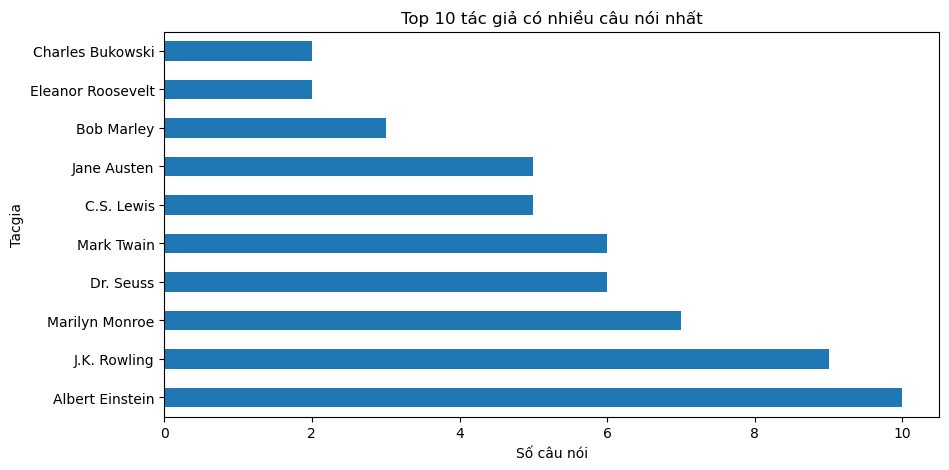

In [20]:
#trtuc quan tac gia va so cau noi
df["Tacgia"].value_counts().head(10).plot(kind='barh', title="Top 10 tác giả có nhiều câu nói nhất", figsize=(10,5))
plt.xlabel("Số câu nói")
plt.show()

### 3.2.2f Phân tích, trực quan mối quan hệ giữa các tác giả với nhau

luu thanh cong



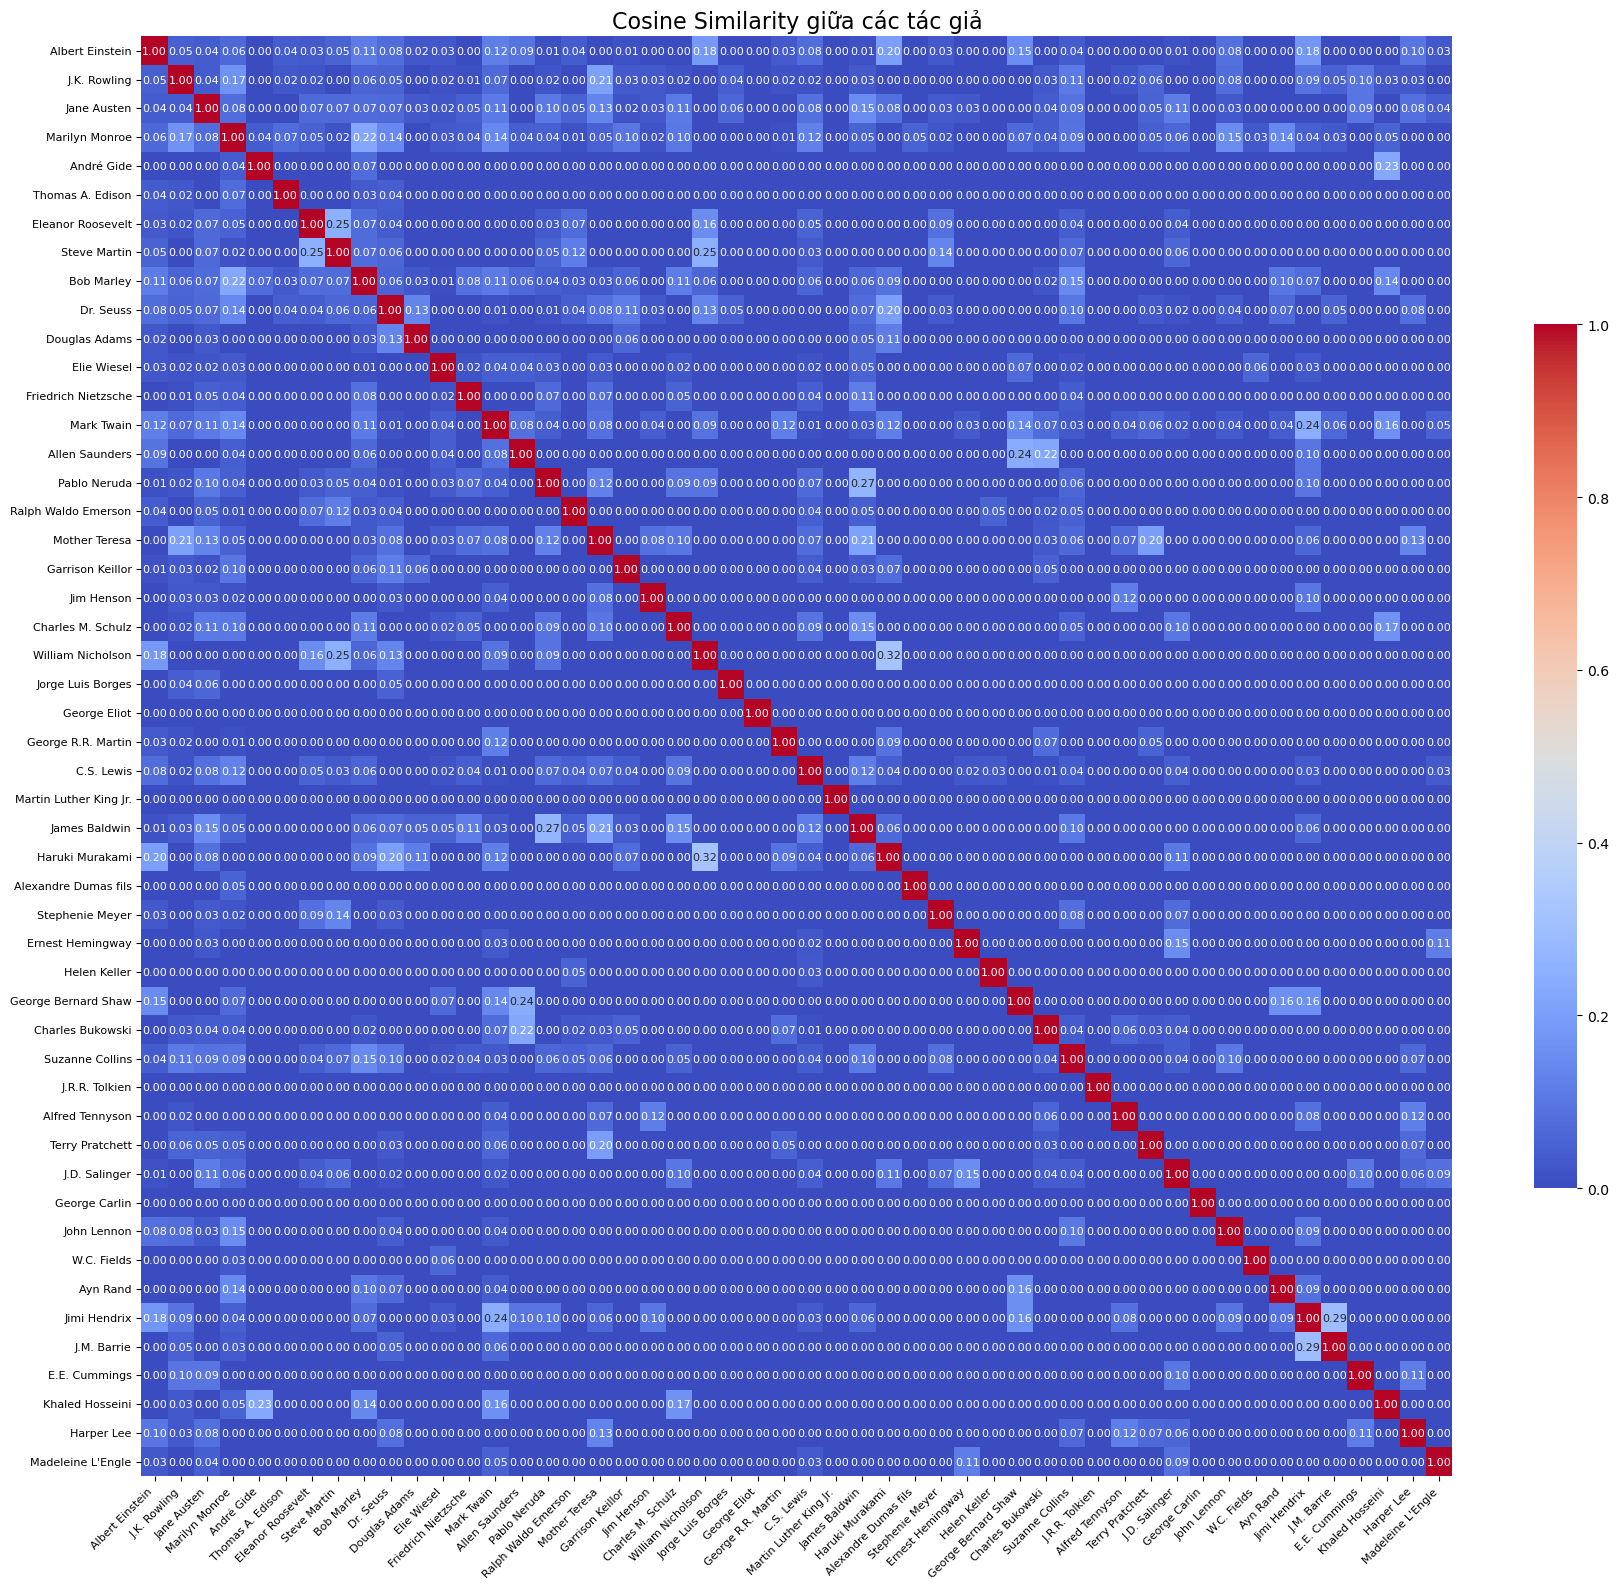

 Các cặp tác giả có độ tương đồng cao nhất:

William Nicholson ↔ Haruki Murakami → cosine similarity = 0.32


In [21]:

from bs4 import BeautifulSoup
import time
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


html_data = crawl_3_1()
soup = BeautifulSoup(html_data, 'html.parser')
quotes = soup.find_all('div', class_='quote')

# Tạo danh sách trích dẫn và tác giả
quote_texts = []
authors = []
for quote in quotes:
    text = quote.find('span', class_='text').text
    author = quote.find('small', class_='author').text
    quote_texts.append(text)
    authors.append(author)

# Gộp các trích dẫn theo tác giả
author_quotes = {}
for author, quote in zip(authors, quote_texts):
    if author not in author_quotes:
        author_quotes[author] = []
    author_quotes[author].append(quote)

# Tạo văn bản gộp cho mỗi tác giả
author_texts = {author: ' '.join(quotes) for author, quotes in author_quotes.items()}
author_list = list(author_texts.keys())
texts = list(author_texts.values())

# Tính TF-IDF và cosine similarity
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
cosine_sim = cosine_similarity(tfidf_matrix)

# Tạo similarity_df
similarity_df = pd.DataFrame(cosine_sim, index=author_list, columns=author_list)


# Hiển thị heatmap rõ ràng
plt.figure(figsize=(18, 16))  # tăng kích thước
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.6})
plt.title('Cosine Similarity giữa các tác giả', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# In ra các cặp tác giả có độ tương đồng cao nhất
authors = similarity_df.index.tolist()
pairs = []

for i in range(len(authors)):
    for j in range(i + 1, len(authors)):
        sim = similarity_df.iloc[i, j]
        if sim > 0.3:  # Ngưỡng tùy chỉnh
            pairs.append((authors[i], authors[j], sim))

# Sắp xếp giảm dần
pairs.sort(key=lambda x: x[2], reverse=True)

#  In kết quả
print(" Các cặp tác giả có độ tương đồng cao nhất:\n")
for a1, a2, sim in pairs:
    print(f"{a1} ↔ {a2} → cosine similarity = {sim:.2f}")


### 3.2.4a dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù hợp

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Bước 1: Lọc dữ liệu - giữ tác giả có ít nhất 3 câu
author_counts = df['Tacgia'].value_counts()
valid_authors = author_counts[author_counts >= 3].index
df_filtered = df[df['Tacgia'].isin(valid_authors)].reset_index(drop=True)

# Bước 2: Vector hóa TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df_filtered['Quote'])
y = df_filtered['Tacgia']

# Bước 3: Stratified Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Bước 4: Huấn luyện model
model = MultinomialNB()
model.fit(X_train, y_train)

# Bước 5: Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Bước 6: Kiểm tra số lượng câu nói theo tác giả
print("Số câu theo tác giả trong tập Train:")
print(y_train.value_counts())
print("\nSố câu theo tác giả trong tập Test:")
print(y_test.value_counts())


Accuracy: 0.2727272727272727
                 precision    recall  f1-score   support

Albert Einstein       0.20      1.00      0.33         2
     Bob Marley       0.00      0.00      0.00         1
     C.S. Lewis       0.00      0.00      0.00         1
      Dr. Seuss       0.00      0.00      0.00         1
   J.K. Rowling       1.00      0.50      0.67         2
    Jane Austen       0.00      0.00      0.00         1
 Marilyn Monroe       0.00      0.00      0.00         2
     Mark Twain       0.00      0.00      0.00         1

       accuracy                           0.27        11
      macro avg       0.15      0.19      0.12        11
   weighted avg       0.22      0.27      0.18        11

Số câu theo tác giả trong tập Train:
Tacgia
Albert Einstein    8
J.K. Rowling       7
Marilyn Monroe     5
Dr. Seuss          5
Mark Twain         5
Jane Austen        4
C.S. Lewis         4
Bob Marley         2
Name: count, dtype: int64

Số câu theo tác giả trong tập Test:
Tacgia
Al

d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 3.2.4b  tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất

luu thanh cong



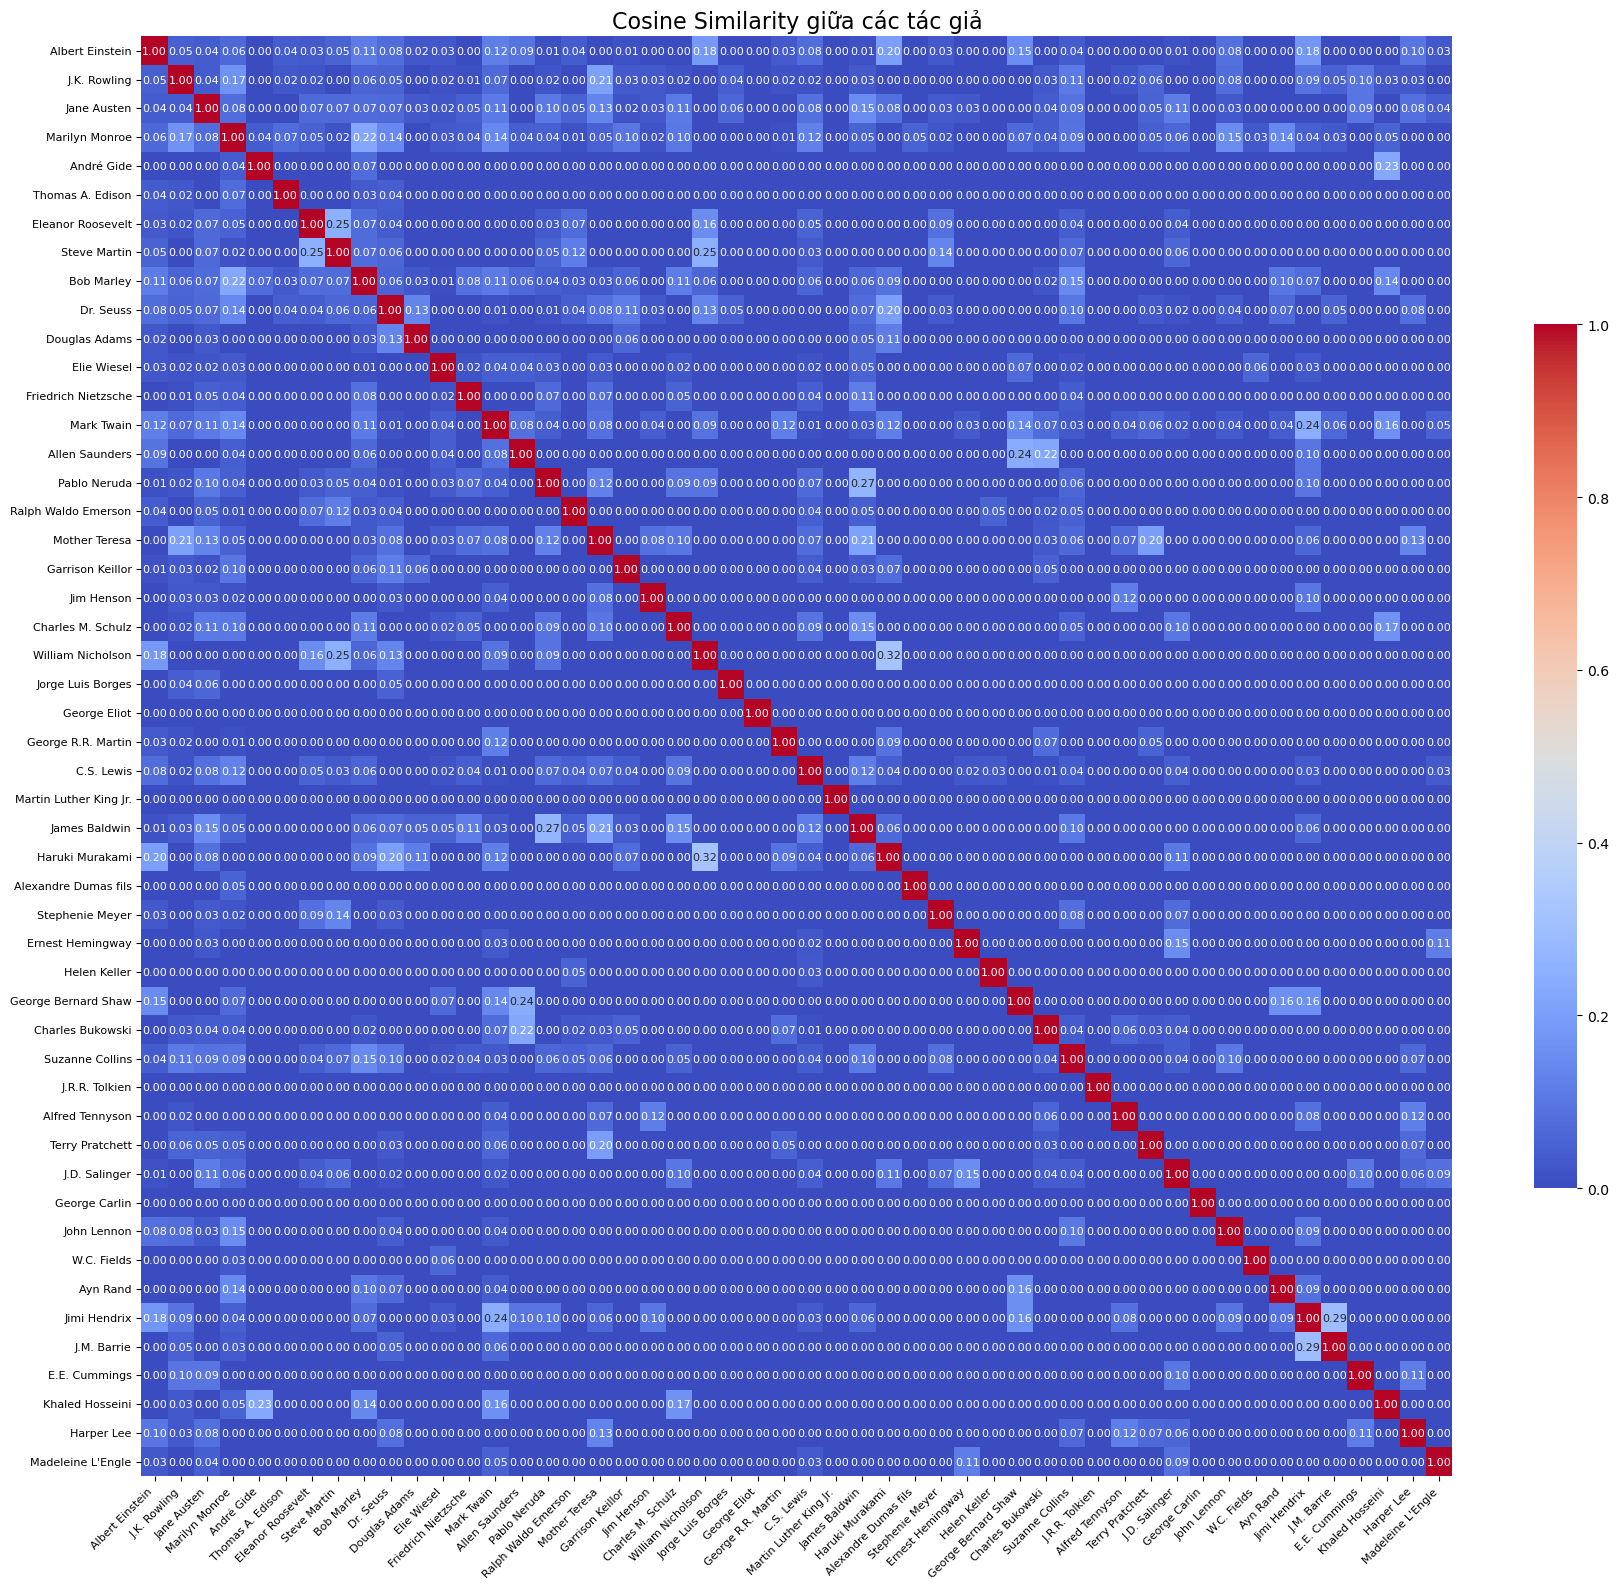

 Các cặp tác giả có độ tương đồng cao nhất:

William Nicholson ↔ Haruki Murakami → cosine similarity = 0.32

lý do có độ tương đồng cao:
- Có thể do cùng chủ đề (ví dụ: tình yêu, chiến tranh, nhân văn...)
- Dùng nhiều từ chung và biểu đạt tương tự nhau trong văn phong
- Cùng thể loại tác phẩm: tiểu thuyết, thơ, triết lý,...
- Độ dài văn bản đủ lớn giúp thống kê từ vựng ổn định


In [23]:

from bs4 import BeautifulSoup
import time
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


html_data = crawl_3_1()
soup = BeautifulSoup(html_data, 'html.parser')
quotes = soup.find_all('div', class_='quote')

# Tạo danh sách trích dẫn và tác giả
quote_texts = []
authors = []
for quote in quotes:
    text = quote.find('span', class_='text').text
    author = quote.find('small', class_='author').text
    quote_texts.append(text)
    authors.append(author)

# Gộp các trích dẫn theo tác giả
author_quotes = {}
for author, quote in zip(authors, quote_texts):
    if author not in author_quotes:
        author_quotes[author] = []
    author_quotes[author].append(quote)

# Tạo văn bản gộp cho mỗi tác giả
author_texts = {author: ' '.join(quotes) for author, quotes in author_quotes.items()}
author_list = list(author_texts.keys())
texts = list(author_texts.values())

# Tính TF-IDF và cosine similarity
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)
cosine_sim = cosine_similarity(tfidf_matrix)

# Tạo similarity_df
similarity_df = pd.DataFrame(cosine_sim, index=author_list, columns=author_list)


# Hiển thị heatmap rõ ràng
plt.figure(figsize=(18, 16))  # tăng kích thước
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.6})
plt.title('Cosine Similarity giữa các tác giả', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# In ra các cặp tác giả có độ tương đồng cao nhất
authors = similarity_df.index.tolist()
pairs = []

for i in range(len(authors)):
    for j in range(i + 1, len(authors)):
        sim = similarity_df.iloc[i, j]
        if sim > 0.3:  # Ngưỡng tùy chỉnh
            pairs.append((authors[i], authors[j], sim))

# Sắp xếp giảm dần
pairs.sort(key=lambda x: x[2], reverse=True)

#  In kết quả
print(" Các cặp tác giả có độ tương đồng cao nhất:\n")
for a1, a2, sim in pairs:
    print(f"{a1} ↔ {a2} → cosine similarity = {sim:.2f}")


print("\nlý do có độ tương đồng cao:")
print("- Có thể do cùng chủ đề (ví dụ: tình yêu, chiến tranh, nhân văn...)")
print("- Dùng nhiều từ chung và biểu đạt tương tự nhau trong văn phong")
print("- Cùng thể loại tác phẩm: tiểu thuyết, thơ, triết lý,...")
print("- Độ dài văn bản đủ lớn giúp thống kê từ vựng ổn định")